## Techniques

1. Baseline Recommenders - https://github.com/llSourcell/recommender_live/blob/master/Song%20Recommender_Python.ipynb

2. Content Based Recommenders - If products and features and learn parameters for every user.

3. Matrix Factorization for Collaborative Filtering - http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python

4. Deep Learning for Collaborative Filtering - http://tech.hulu.com/blog/2016/08/01/cfnade.html

## Matrix Factorization

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### Data

In [71]:
customer_data = pd.DataFrame({'Alice' : [5,5,0,0,0], 
                              'Bob' : [5,0,4,0,0], 
                              'Carol' : [0,0,0,5,5], 
                              'Dave' : [0,0,0,4,0]}, 
                              index = ['Romantic A','Romantic B','Action A','Action B','Action C'])

In [72]:
customer_data

,Alice,Bob,Carol,Dave
Romantic A,5,5,0,0
Romantic B,5,0,0,0
Action A,0,4,0,0
Action B,0,0,5,4
Action C,0,0,5,0


### Parameters

In [73]:
ratings_matrix = customer_data.values
num_movies = int(ratings_matrix.shape[0])
num_users = int(ratings_matrix.shape[1])
optimization_steps = 5000
threshold = 0.001
num_features = 2
alpha = 0.002
beta = 0.01

### Optimization

In [74]:
movies_matrix = np.random.rand(num_movies, num_features)
users_matrix = np.random.rand(num_users, num_features)
users_matrix = users_matrix.T
for i in range(optimization_steps):
    for i in range(num_movies):
        for j in range(num_users):
            if ratings_matrix[i][j] > 0:
                eij = ratings_matrix[i][j] - np.dot(movies_matrix[i,:], users_matrix[:,j])
                for k in range(num_features):
                    movies_matrix[i][k] = movies_matrix[i][k] + alpha*(2*eij*users_matrix[k][j] - beta*movies_matrix[i][k])
                    users_matrix[k][j] = users_matrix[k][j] + alpha*(2*eij*movies_matrix[i][k] - beta*users_matrix[k][j])

    pred_ratings_matrix = np.matmul(movies_matrix, users_matrix)
    error = 0
    for i in range(num_movies):
        for j in range(num_users):
            if ratings_matrix[i][j] > 0:
                error = error + (ratings_matrix[i][j] - pred_ratings_matrix[i][j])**2
                for k in range(num_features):
                    error = error + beta/2*(movies_matrix[i][k]**2 + users_matrix[k][j]**2)
    if error < threshold:
        break    

### Results

In [80]:
ratings_matrix

array([[5, 5, 0, 0],
       [5, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 5, 4],
       [0, 0, 5, 0]], dtype=int64)

In [82]:
pred_ratings_matrix.round(2)

array([[ 5.  ,  4.99,  5.03,  4.07],
       [ 4.99,  4.94,  5.08,  4.09],
       [ 4.07,  4.  ,  4.19,  3.35],
       [ 4.85,  4.74,  4.99,  4.  ],
       [ 4.82,  4.68,  5.  ,  3.98]])

In [83]:
movies_matrix

array([[ 1.82126595,  1.25578637],
       [ 1.7147873 ,  1.38910067],
       [ 1.31355806,  1.24080839],
       [ 1.53690722,  1.51044983],
       [ 1.450082  ,  1.59634897]])

#### We learn a low-dimensional representation for movies

In [114]:
movies = pd.DataFrame({'x' : movies_matrix[:,0], 'y' : movies_matrix[:,1], 'genre' : ['red','red','blue','blue','blue']})

In [115]:
movies

,genre,x,y
0,red,1.821266,1.255786
1,red,1.714787,1.389101
2,blue,1.313558,1.240808
3,blue,1.536907,1.510450
4,blue,1.450082,1.596349


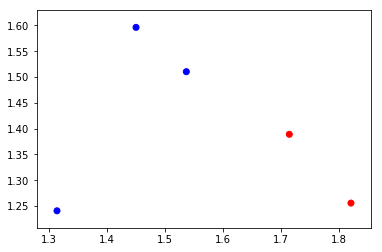

In [116]:
plt.scatter(movies['x'], movies['y'], c = movies['genre'])

In [84]:
users_matrix.T

array([[ 1.77305565,  1.40677203],
       [ 1.93118604,  1.1758606 ],
       [ 1.6229139 ,  1.6549767 ],
       [ 1.38355864,  1.23760284]])

In [85]:
error

0.3327920120321069